In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

seed = 3
np.random.seed(seed)

tour_type = "hetero_dr_sd_max"
M = [5, 1/10000]
R = [0.4, 1.25]
D = [0.3, 1.25]
W = [.5, .05]

agents = get_agents(homogenous = False, M = M, R = R, D = D, W = W)
#check_parameters(agents)
#compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = None, 
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 11 minutes.


In [6]:
a = pd.DataFrame(tour.strategy_evolution)
a.columns = [col_name.name for col_name in a.columns]
a

,defect,tit_for_tat,generous_tit_for_tat,cooperate
0,22,29,27,22
1,22,29,27,22
2,22,29,28,21
3,23,28,28,21
4,23,28,29,20
5,23,28,29,20
6,23,28,30,19
7,23,28,31,18
8,23,27,31,19
9,23,28,30,19


In [4]:
distributions_outcomes = outcomes_dict_per_round(tour)
print(round(mean(distributions_outcomes['Exploitation'])/int(len(agents)*(len(agents) - 1) / 2),2))
print(round(mean(distributions_outcomes['Mutual_Cooperation'])/int(len(agents)*(len(agents) - 1) / 2),2))
print(round(mean(distributions_outcomes['Mutual_Defection'])/int(len(agents)*(len(agents) - 1) / 2),2))

0.25
0.38
0.37


In [2]:
df = pd.DataFrame([[c.name, c.m, c.d, c.r, c.w] for c in list(tour.graph.nodes)], columns=['name', 'm', 'd', 'r', 'w']).set_index('name')
df_full = get_outcomes(tour, df)
df_full_pd = pd.DataFrame(df_full)
df_c = pd.concat([df, df_full_pd.T], axis=1)
df_c.head(20)

,m,d,r,w,P,R,S,T
0,5.0,0.89,0.55,0.49,192941,569009,124205,103845
1,5.0,0.21,0.61,0.49,231627,500873,104890,152610
2,5.0,0.53,0.22,0.46,173919,599703,124481,91897
3,5.0,0.36,0.45,0.50,220017,551919,109724,108340
4,5.0,0.64,0.25,0.52,192961,593269,112805,90965
5,5.0,0.84,0.96,0.55,195074,581415,113307,100204
6,5.0,0.64,0.12,0.57,245323,507794,94661,142222
7,5.0,0.14,0.12,0.46,187812,568439,120699,113050
8,5.0,0.93,0.90,0.43,197423,581156,115117,96304
9,5.0,0.36,0.37,0.48,208090,554454,121999,105457


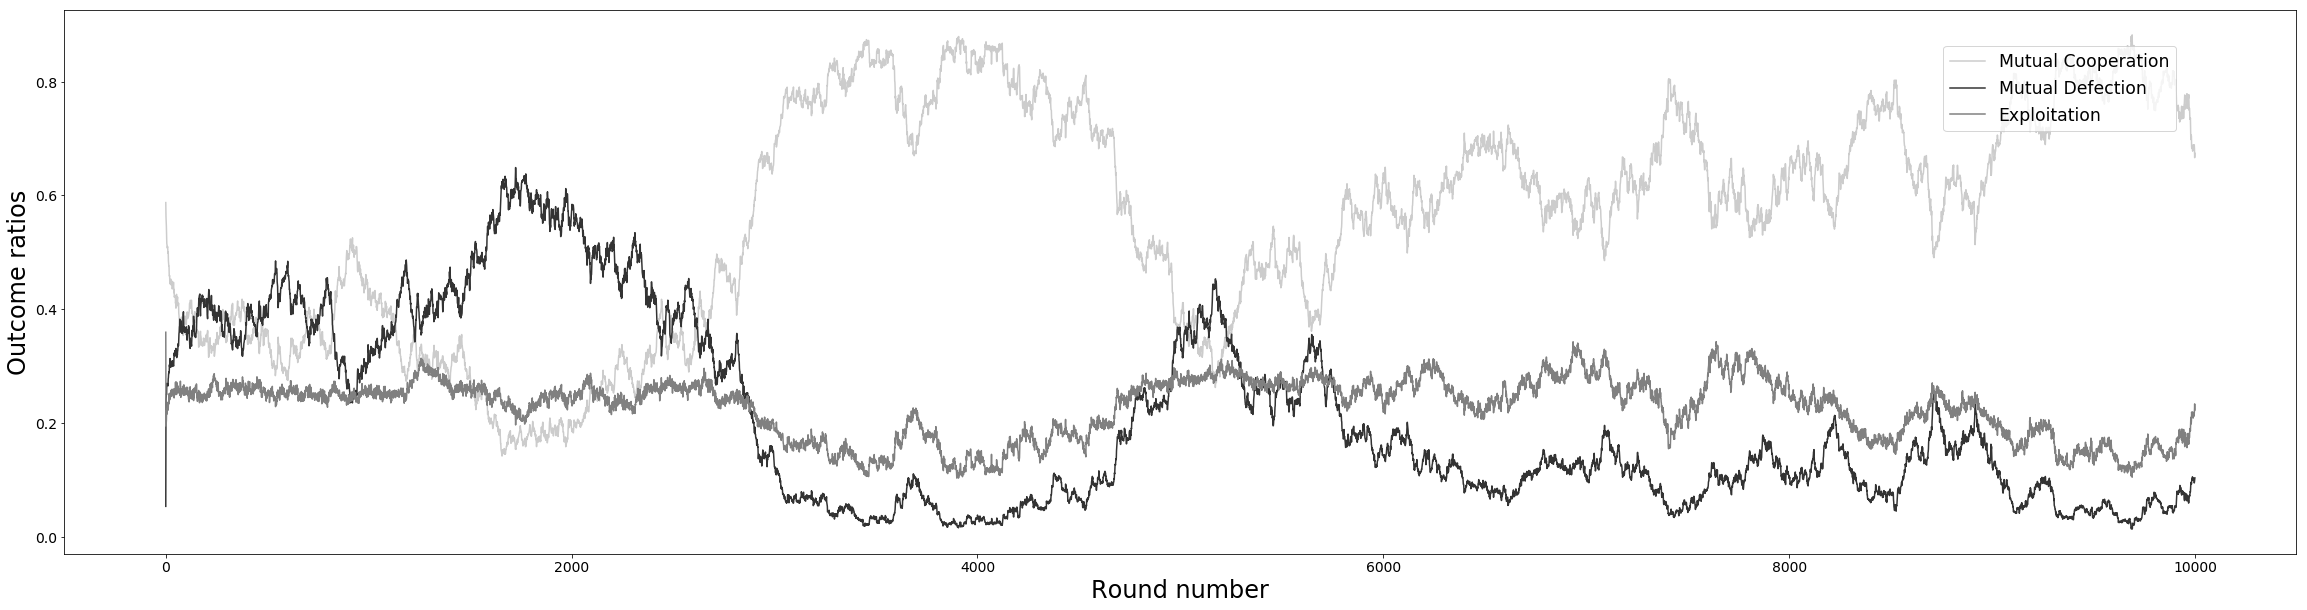

In [5]:
outcome_ratios_per_round(tour)

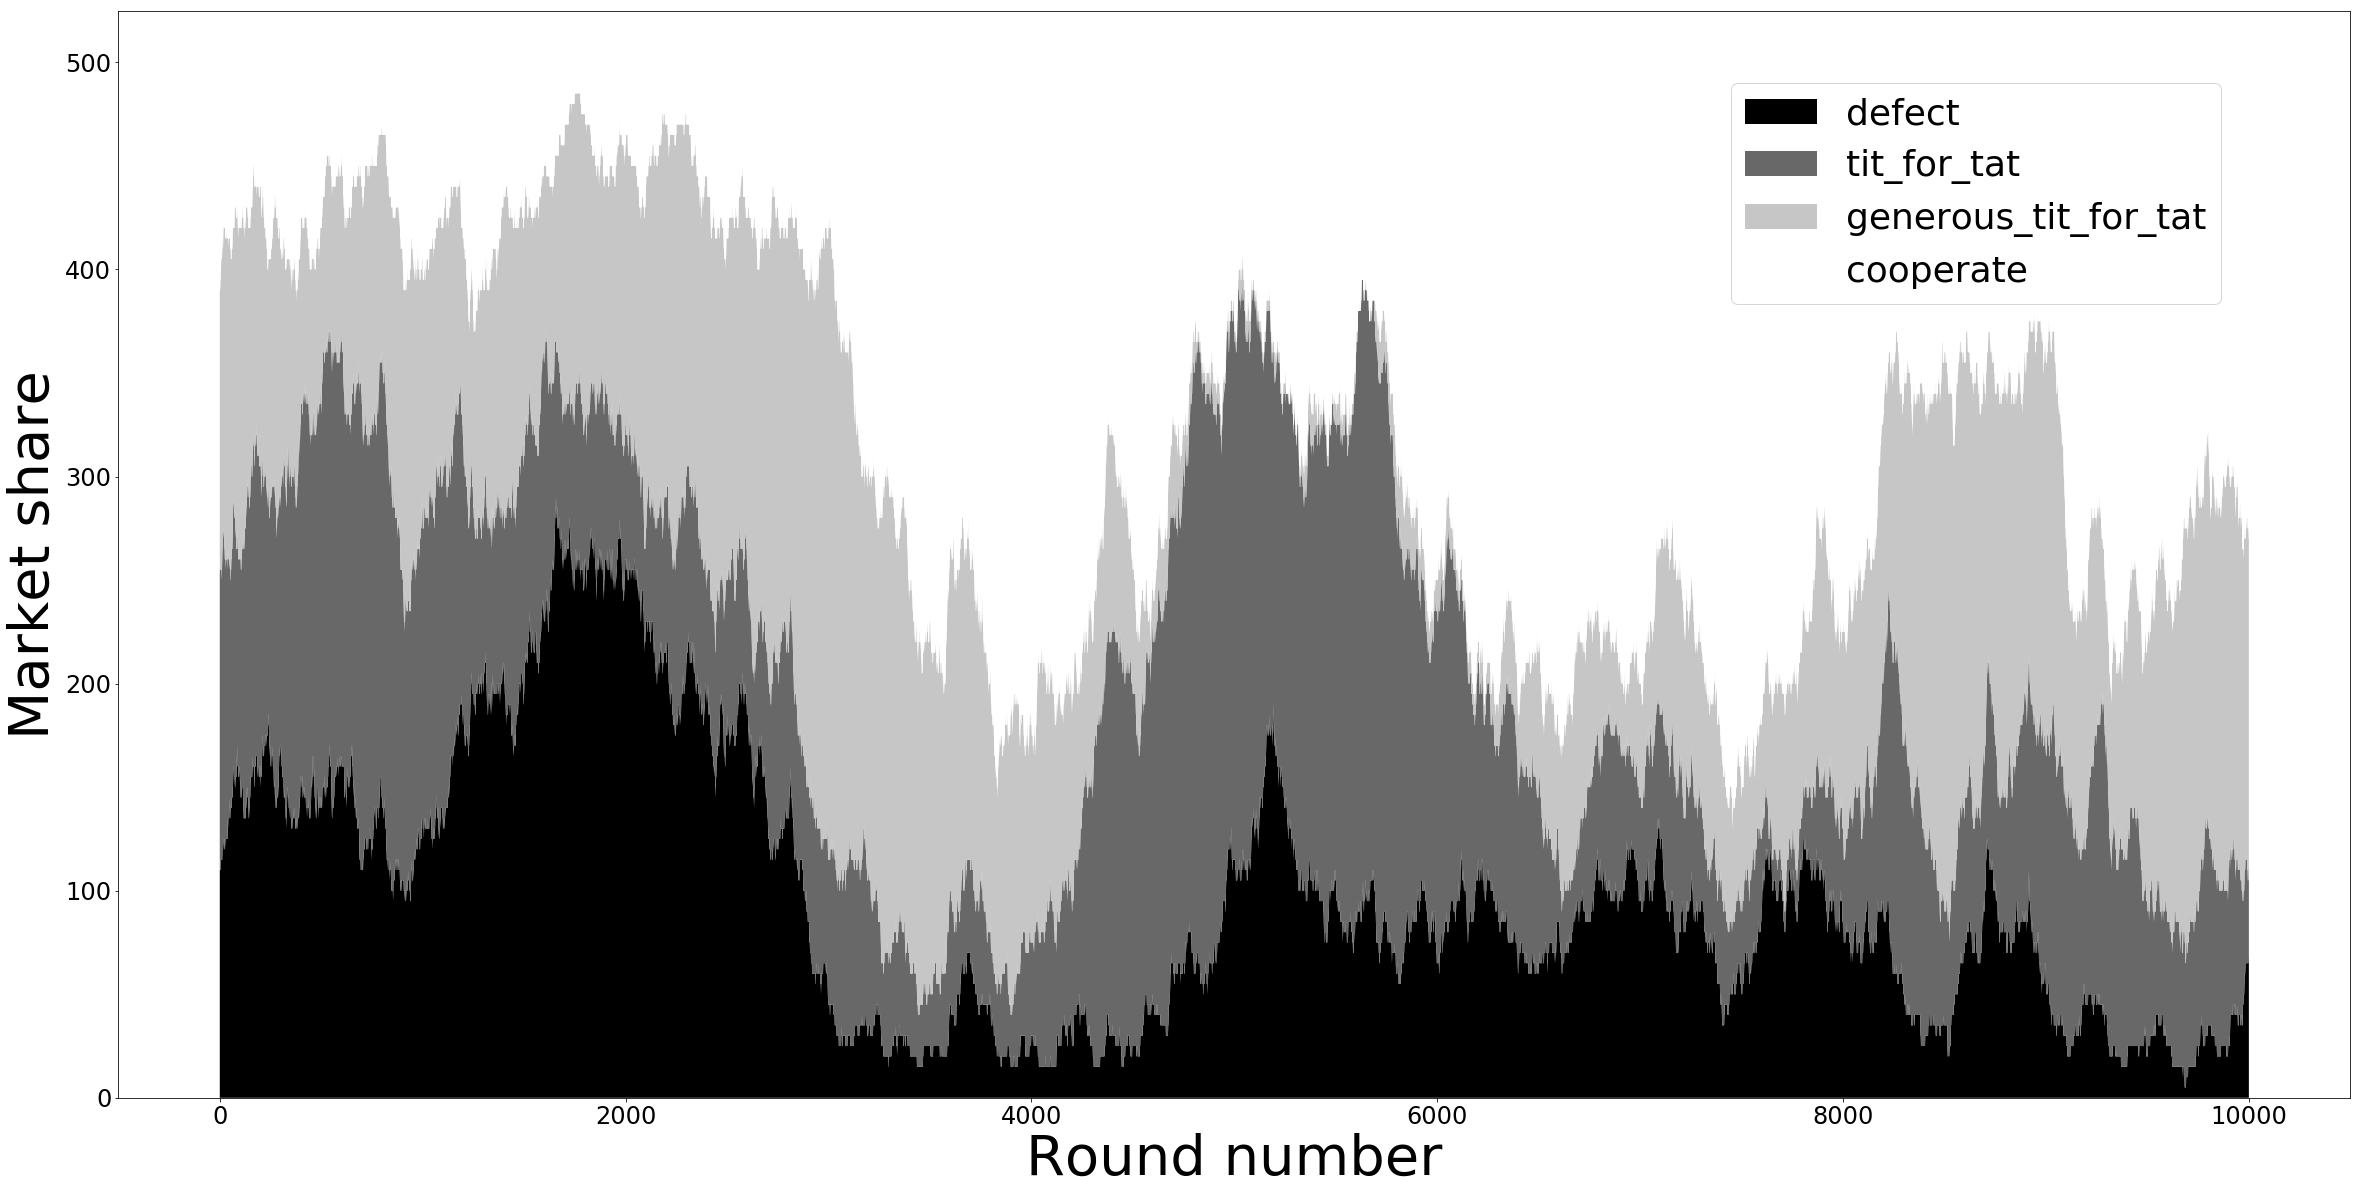

In [4]:
draw_stack(tour)